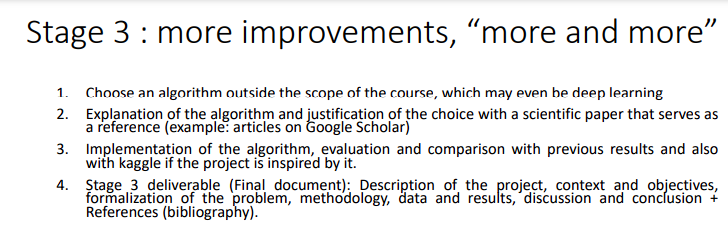

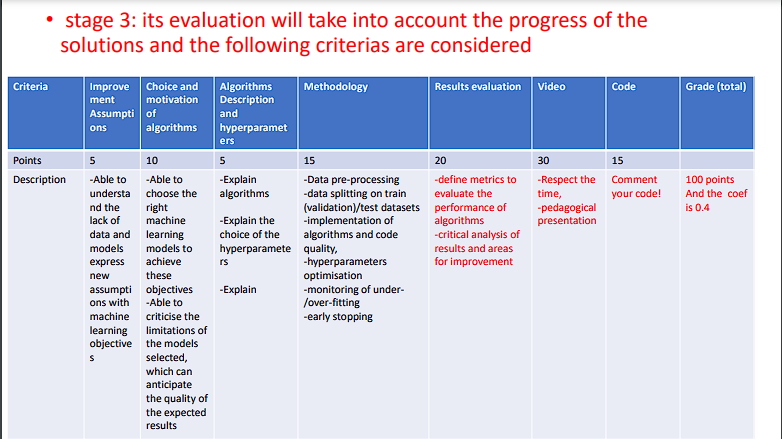

# Imports

In [5]:
!pip install keras-tcn

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tcn import TCN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# 1st approach: CNN

##  First: direct prediction of residual_load

First we directly predict residual_load by using a CNN. We use all previously used features and add time as a variable, we extract the day of the week, the month and the date and add them as a variable. We then normalize them and apply the CNN to them. 

Model Definition and explanation of some parameters:<br>
Conv1D(32, kernel_size=3, activation='relu'): Extracts local patterns from the data using 32 filters of size 3. ReLU activation introduces non-linearity and accelerates convergence. Conv1D(64, kernel_size=3, activation='relu'): A second convolutional layer with 64 filters further processes the feature maps.<br>

Global Max Pooling: pooling operation used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions of a feature map.

Early stopping is a regularization technique used in machine learning and deep learning to prevent overfitting during training. It stops the training process when the model's performance on a validation dataset stops improving.

Epoch 1/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - loss: 8094.9521 - mse: 8094.9521 - val_loss: 3639.4441 - val_mse: 3639.4441
Epoch 2/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - loss: 4213.5542 - mse: 4213.5542 - val_loss: 3285.0369 - val_mse: 3285.0369
Epoch 3/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - loss: 3895.6018 - mse: 3895.6018 - val_loss: 3087.5325 - val_mse: 3087.5325
Epoch 4/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: 3598.1238 - mse: 3598.1238 - val_loss: 2988.3840 - val_mse: 2988.3840
Epoch 5/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 3463.2400 - mse: 3463.2400 - val_loss: 2947.0676 - val_mse: 2947.0676
Epoch 6/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - loss: 3403.6619 - mse: 3403.6619 - val_loss: 2834.3203 - val_mse: 2834.3203
Epoch 7/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: 3338.2786 - mse: 3338.2786 - val_loss: 2761.3777 - val_mse: 2761.3777
Epoch 8/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/ste

2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - loss: 2745.9150 - mse: 2745.9150 - val_loss: 2348.4346 - val_mse: 2348.4346
Epoch 50/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - loss: 2672.6382 - mse: 2672.6382 - val_loss: 2256.0720 - val_mse: 2256.0720
Epoch 51/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 2659.9387 - mse: 2659.9387 - val_loss: 2378.1125 - val_mse: 2378.1125
Epoch 52/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 2665.9226 - mse: 2665.9226 - val_loss: 2275.4685 - val_mse: 2275.4685
Epoch 53/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 2702.6912 - mse: 2702.6912 - val_loss: 2260.2859 - val_mse: 2260.2859
Epoch 54/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: 2673.5740 - mse: 2673.5740 - val_loss: 2269.8311 - val_mse: 2269.8311
Epoch 55/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - loss: 2625.0750 - mse: 2625.0750 - val_loss: 2284.0835 - val_mse: 2284.0835
Epoch 56/100
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - l

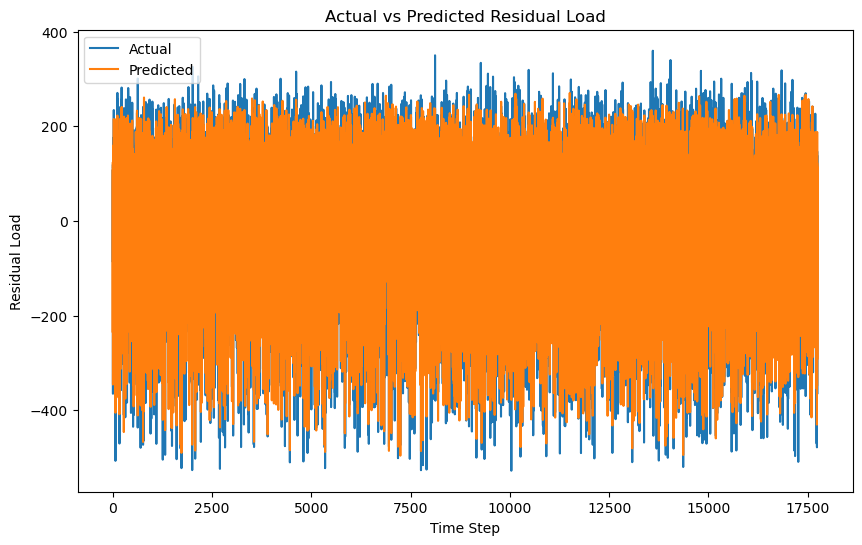

In [6]:
# Load the data
data = pd.read_csv(r"C:\Users\jeanm\Downloads\train.csv")

# Add time-based features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek
data['month'] = data['time'].dt.month

# Define features and target
features = ['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'hour', 'day_of_week', 'month']
target = 'residual_load'

# Prepare data for training
X = data[features].values
y = data[target].values

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X[..., np.newaxis]  # Add a channel dimension

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
input_layer = Input(shape=(X_train.shape[1], 1))  # Input shape: (features, channels)

# Convolutional layers
x = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Fully connected layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1)(x)  # Output layer for regression

model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1
)

# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse}")
rmse = sqrt(test_mse)
print(f"Test RMSE: {rmse}")

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.title('Actual vs Predicted Residual Load')
plt.xlabel('Time Step')
plt.ylabel('Residual Load')
plt.legend()
plt.show()

## Second: prediction of residual_load through P and load

We now try to better our prediction by predicting P and load instead of residual_load in a similar fashion to what we did in stage 2. We also tried to predict both values in separate CNNs but the results were not good. The following code is very similar to the previous one but adapted to output 2 variables.

Epoch 1/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 12635.0996 - output_P_mse: 7699.0986 - output_load_mse: 4936.0020 - val_loss: 3412.5056 - val_output_P_mse: 2178.4961 - val_output_load_mse: 1234.0095
Epoch 2/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - loss: 3799.0039 - output_P_mse: 2396.2068 - output_load_mse: 1402.7952 - val_loss: 3183.9897 - val_output_P_mse: 2216.2693 - val_output_load_mse: 967.7228
Epoch 3/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - loss: 3485.3594 - output_P_mse: 2327.3506 - output_load_mse: 1158.0083 - val_loss: 2916.3430 - val_output_P_mse: 2057.3208 - val_output_load_mse: 859.0200
Epoch 4/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - loss: 3282.5037 - output_P_mse: 2251.8330 - output_load_mse: 1030.6721 - val_loss: 2729.8901 - val_output_P_mse: 1993.5393 - val_output_load_mse: 736.3482
Epoch 5/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - loss: 3208.0898 - output_P_mse: 2254.9250 - output_load_mse: 953.1644 - val_loss: 2836.990

2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - loss: 2514.0483 - output_P_mse: 1896.8739 - output_load_mse: 617.1747 - val_loss: 2229.8772 - val_output_P_mse: 1714.9310 - val_output_load_mse: 514.9446
Epoch 35/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - loss: 2522.9170 - output_P_mse: 1891.3636 - output_load_mse: 631.5521 - val_loss: 2363.4858 - val_output_P_mse: 1848.1648 - val_output_load_mse: 515.3203
Epoch 36/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - loss: 2517.6514 - output_P_mse: 1894.5546 - output_load_mse: 623.0964 - val_loss: 2177.3394 - val_output_P_mse: 1709.1389 - val_output_load_mse: 468.2006
Epoch 37/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 2514.8499 - output_P_mse: 1898.1360 - output_load_mse: 616.7159 - val_loss: 2180.5190 - val_output_P_mse: 1715.5592 - val_output_load_mse: 464.9586
Epoch 38/50
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2517.4436 - output_P_mse: 1892.3868 - output_load_mse: 625.0567 - val_loss: 2148.3184 - val_outpu

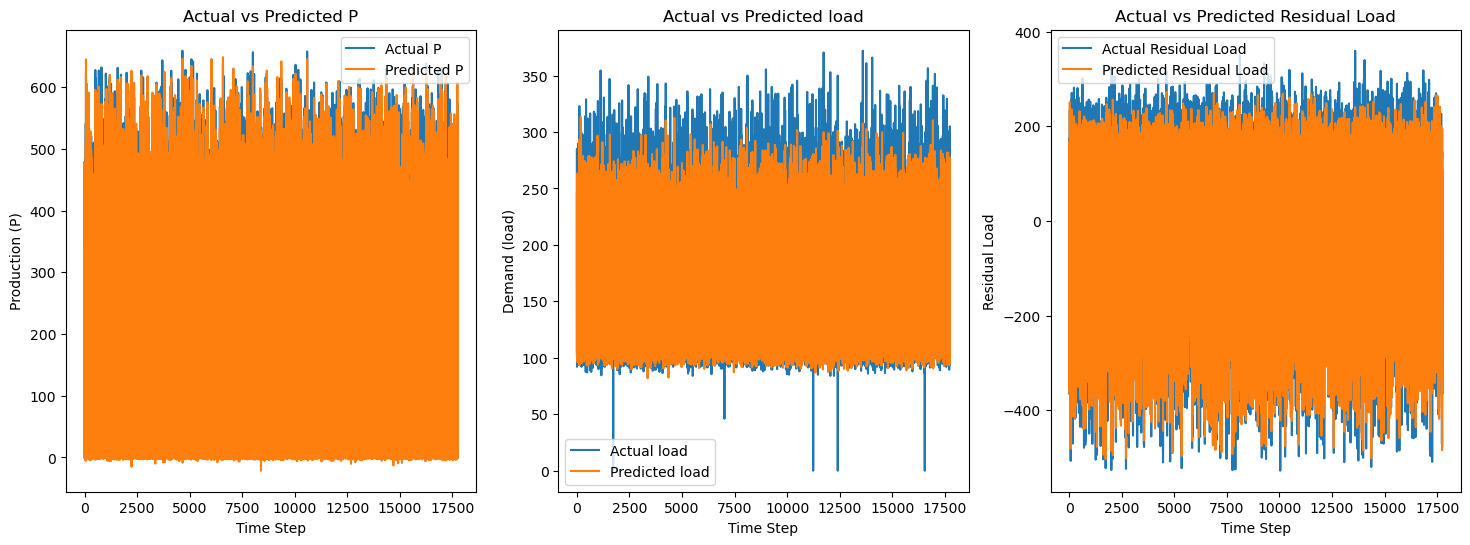

In [9]:
# Load the data
data=pd.read_csv(r"C:\Users\jeanm\Downloads\train.csv")

# Add time-based features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek
data['month'] = data['time'].dt.month

# Define features for the CNN
features = ['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'hour', 'day_of_week', 'month']
target_columns = ['P', 'load']

# Prepare data
X = data[features].values
y = data[target_columns].values

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN (1D input)
X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Define the CNN model for multi-output prediction
input_layer = Input(shape=(X_train.shape[1], 1))

x = Conv1D(filters=96, kernel_size=3, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Conv1D(filters=80, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layers for P and load
output_P = Dense(1, name='output_P')(x)
output_load = Dense(1, name='output_load')(x)

# Create the model
model = Model(inputs=input_layer, outputs=[output_P, output_load])

# Compile the model with separate metrics for each output
model.compile(
    optimizer='adam',
    loss={'output_P': 'mse', 'output_load': 'mse'},
    metrics={'output_P': ['mse'], 'output_load': ['mse']}
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, {'output_P': y_train[:, 0], 'output_load': y_train[:, 1]},
    validation_data=(X_test, {'output_P': y_test[:, 0], 'output_load': y_test[:, 1]}),
    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
)

# Evaluate the model
test_loss = model.evaluate(X_test, {'output_P': y_test[:, 0], 'output_load': y_test[:, 1]}, verbose=0)
print(f"Test Loss (P and load): {test_loss}")

# Predict P and load
y_pred = model.predict(X_test)

# Calculate RMSE for P and load
rmse_P = sqrt(mean_squared_error(y_test[:, 0], y_pred[0]))
rmse_load = sqrt(mean_squared_error(y_test[:, 1], y_pred[1]))
print(f"RMSE for P prediction: {rmse_P}")
print(f"RMSE for load prediction: {rmse_load}")

# Calculate the true and predicted residual load
residual_load_test = y_test[:, 1] - y_test[:, 0]  # True residual_load (load - P)
residual_load_pred = y_pred[1].flatten() - y_pred[0].flatten()  # Predicted residual_load (predicted load - predicted P)

# Calculate RMSE for residual load
rmse_residual = sqrt(mean_squared_error(residual_load_test, residual_load_pred))
print(f"RMSE for residual load prediction: {rmse_residual}")

# Plot actual vs predicted P, load, and residual load
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(y_test[:, 0], label='Actual P')
plt.plot(y_pred[0], label='Predicted P')
plt.title('Actual vs Predicted P')
plt.xlabel('Time Step')
plt.ylabel('Production (P)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test[:, 1], label='Actual load')
plt.plot(y_pred[1], label='Predicted load')
plt.title('Actual vs Predicted load')
plt.xlabel('Time Step')
plt.ylabel('Demand (load)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(residual_load_test, label='Actual Residual Load')
plt.plot(residual_load_pred, label='Predicted Residual Load')
plt.title('Actual vs Predicted Residual Load')
plt.xlabel('Time Step')
plt.ylabel('Residual Load')
plt.legend()

plt.show()


## Third: pre-processing and parameters adjusment on multi output CNN

We then tried to optimise this CNN through a number of changes: pre processing with the model_repeat method used in stage 2. We adjusted the parameters and the epoch number to adjust for overfitting (adjusting to have the best kaggle result not the best RMSE result).

In [10]:
data1 = pd.read_csv(r"C:\Users\jeanm\Downloads\train.csv")

# Create the total_G column
data1['total_G'] = data1['Gb(i)'] + data1['Gd(i)']
data1['time'] = pd.to_datetime(data1['time'])
data1['hour'] = data1['time'].dt.hour
data1['day_of_week'] = data1['time'].dt.dayofweek
data1['month'] = data1['time'].dt.month

def model_repeat(model, rounds, X_cols, y_col, df, error_multiplier):
    
    scores = []
    length = []
    
    for round in range(rounds):
        
        # Number of rows for itteration
        length.append(len(df.index))
        
        # Set X and y columns and df for iteration and calculate mean rmse
        X = df.loc[:,X_cols]
        y = df.loc[:,'P']
        scores.append(np.mean(np.absolute(
            cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 3))))
        
        # Fit mode and generate predictions, squared error for each prediction
        solar_model3=model.fit(X,y)
        df.loc[:,'y_pred'] = solar_model3.predict(X)
        df.loc[:,'sq_error']= np.square(df.loc[:,'y_pred'] - y)
        sq_error_threshold = error_multiplier * df.loc[:,'sq_error'].mean()
        # we use the error_multiplier variable to remove only those predictions with too little precision, while retaining the majority of the data. This variable is arbitrarily chosen
        
        df = df.loc[df.sq_error < sq_error_threshold]
        
        
    return df, scores, length
        
solar_model = RandomForestRegressor()
results = model_repeat(solar_model, 2, ['total_G', 'H_sun', 'T2m', 'WS10m','hour', 'day_of_week', 'month'], ['P'], data1, 7)

Epoch 1/20
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 11697.2832 - output_P_mse: 6838.0562 - output_load_mse: 4859.2290 - val_loss: 1923.0420 - val_output_P_mse: 805.2607 - val_output_load_mse: 1117.7815
Epoch 2/20
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2347.0996 - output_P_mse: 1048.7393 - output_load_mse: 1298.3613 - val_loss: 1571.4388 - val_output_P_mse: 707.4822 - val_output_load_mse: 863.9565
Epoch 3/20
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1950.3773 - output_P_mse: 910.5783 - output_load_mse: 1039.7985 - val_loss: 1361.9552 - val_output_P_mse: 643.1157 - val_output_load_mse: 718.8399
Epoch 4/20
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1761.0984 - output_P_mse: 851.3468 - output_load_mse: 909.7511 - val_loss: 1250.0795 - val_output_P_mse: 612.1790 - val_output_load_mse: 637.9001
Epoch 5/20
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1663.3506 - output_P_mse: 840.6760 - output_load_mse: 822.6741 - val_loss: 1165.1240 - val_output_P

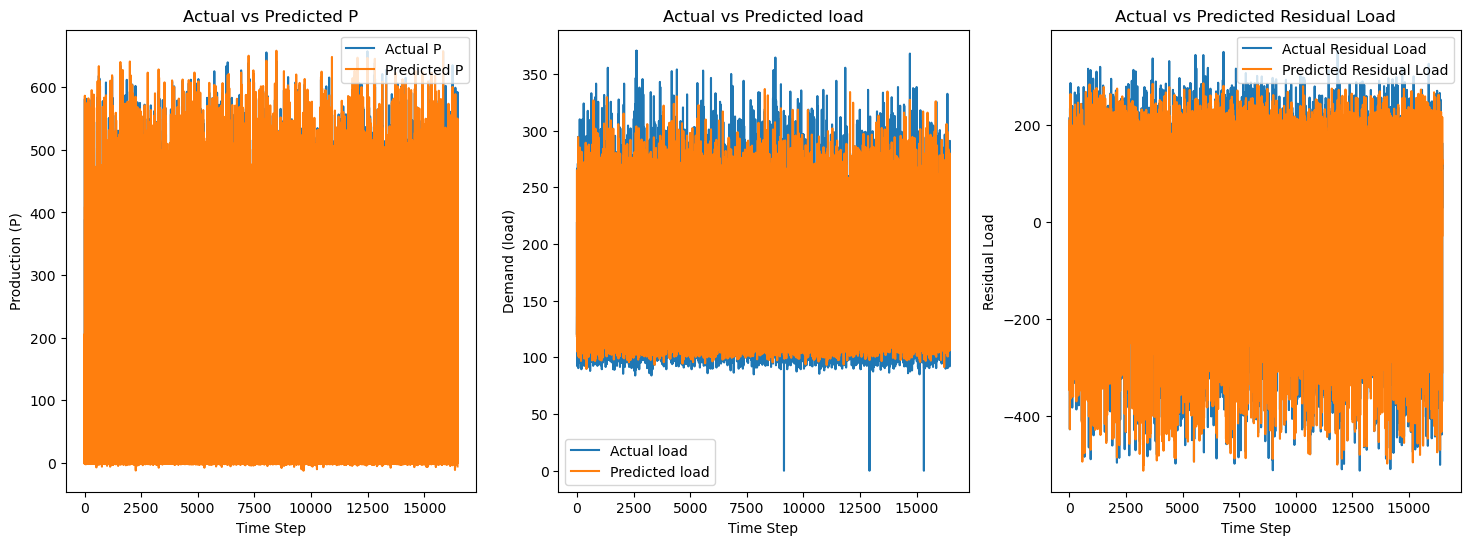

In [11]:
data=results[0]

# Define features for the CNN
features = ['total_G', 'H_sun', 'T2m', 'WS10m', 'hour', 'day_of_week', 'month']
target_columns = ['P', 'load']

# Prepare data
X = data[features].values
y = data[target_columns].values

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN (1D input)
X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Define the CNN model for multi-output prediction
input_layer = Input(shape=(X_train.shape[1], 1))

x = Conv1D(filters=80, kernel_size=3, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Conv1D(filters=80, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layers for P and load
output_P = Dense(1, name='output_P')(x)
output_load = Dense(1, name='output_load')(x)

# Create the model
model = Model(inputs=input_layer, outputs=[output_P, output_load])

# Compile the model with separate metrics for each output
model.compile(
    optimizer='adam',
    loss={'output_P': 'mse', 'output_load': 'mse'},
    metrics={'output_P': ['mse'], 'output_load': ['mse']}
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, {'output_P': y_train[:, 0], 'output_load': y_train[:, 1]},
    validation_data=(X_test, {'output_P': y_test[:, 0], 'output_load': y_test[:, 1]}),
    epochs=20, batch_size=32, callbacks=[early_stopping], verbose=1
)

# Evaluate the model
test_loss = model.evaluate(X_test, {'output_P': y_test[:, 0], 'output_load': y_test[:, 1]}, verbose=0)
print(f"Test Loss (P and load): {test_loss}")

# Predict P and load
y_pred = model.predict(X_test)

# Calculate RMSE for P and load
rmse_P = sqrt(mean_squared_error(y_test[:, 0], y_pred[0]))
rmse_load = sqrt(mean_squared_error(y_test[:, 1], y_pred[1]))
print(f"RMSE for P prediction: {rmse_P}")
print(f"RMSE for load prediction: {rmse_load}")

# Calculate the true and predicted residual load
residual_load_test = y_test[:, 1] - y_test[:, 0]  # True residual_load (load - P)
residual_load_pred = y_pred[1].flatten() - y_pred[0].flatten()  # Predicted residual_load (predicted load - predicted P)

# Calculate RMSE for residual load
rmse_residual = sqrt(mean_squared_error(residual_load_test, residual_load_pred))
print(f"RMSE for residual load prediction: {rmse_residual}")

# Plot actual vs predicted P, load, and residual load
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(y_test[:, 0], label='Actual P')
plt.plot(y_pred[0], label='Predicted P')
plt.title('Actual vs Predicted P')
plt.xlabel('Time Step')
plt.ylabel('Production (P)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test[:, 1], label='Actual load')
plt.plot(y_pred[1], label='Predicted load')
plt.title('Actual vs Predicted load')
plt.xlabel('Time Step')
plt.ylabel('Demand (load)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(residual_load_test, label='Actual Residual Load')
plt.plot(residual_load_pred, label='Predicted Residual Load')
plt.title('Actual vs Predicted Residual Load')
plt.xlabel('Time Step')
plt.ylabel('Residual Load')
plt.legend()

plt.show()

We now apply this last model (the best one for CNNs) to our test data.

In [12]:
# Load the test dataset (without P, load, or residual_load)
test_data = pd.read_csv(r"C:\Users\jeanm\Downloads\test (1).csv")

# Create the total_G column
test_data['total_G'] = test_data['Gb(i)'] + test_data['Gd(i)']

# Add time-based features
test_data['time'] = pd.to_datetime(test_data['time'])
test_data['hour'] = test_data['time'].dt.hour
test_data['day_of_week'] = test_data['time'].dt.dayofweek
test_data['month'] = test_data['time'].dt.month

# Define features for the prediction
features = ['total_G', 'H_sun', 'T2m', 'WS10m', 'hour', 'day_of_week', 'month']

# Prepare test data
X_test_new = test_data[features].values

# Normalize the test data using the scaler fitted on the training data
scaler = StandardScaler()
X_test_new = scaler.fit_transform(X_test_new)

# Reshape data for CNN (1D input)
X_test_new = X_test_new[..., np.newaxis]

# Predict P and load
y_pred_new = model.predict(X_test_new)

# Calculate predicted residual load
residual_load_pred_new = y_pred_new[1].flatten() - y_pred_new[0].flatten()

# Prepare the output DataFrame with time and residual load
output_df = pd.DataFrame({
    'time': test_data['time'],
    'residual_load': residual_load_pred_new
})

# Save the predictions to a CSV file
output_df.to_csv(r"C:\Users\jeanm\Downloads\residual_load_predictions.csv", index=False)

print("Predictions saved successfully.")


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
Predictions saved successfully.
